In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import Counter

In [3]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

#### Check automaton pattern

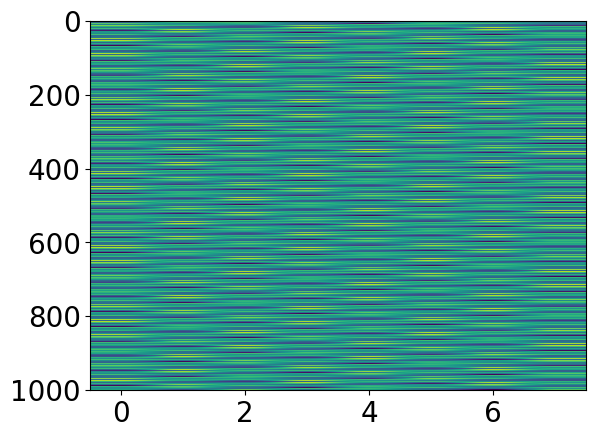

In [69]:
file_name = "../data/240214/rule30_1"
site_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nstep_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',dtype=int,skiprows=1,delimiter=',')
stTraj = raw[:,0].reshape((len(nstep_l),len(site_l)))

plt.imshow(stTraj,aspect='auto')

In [64]:
trunc = 1001
stInt = stTraj[0:trunc,:].dot(1 << np.arange(stTraj.shape[-1] - 1, -1, -1))
print(stInt[0])
stCnt = Counter(stInt)
print(sorted(stCnt.items(), key=lambda pair: pair[1], reverse=False))

156
[(156, 1), (243, 25), (14, 25), (25, 25), (183, 25), (36, 25), (126, 25), (193, 25), (35, 25), (246, 25), (132, 25), (207, 25), (56, 25), (100, 25), (222, 25), (144, 25), (249, 25), (7, 25), (140, 25), (219, 25), (18, 25), (63, 25), (224, 25), (145, 25), (123, 25), (66, 25), (231, 25), (28, 25), (50, 25), (111, 25), (72, 25), (252, 25), (131, 25), (70, 25), (237, 25), (9, 25), (159, 25), (112, 25), (200, 25), (189, 25), (33, 25)]


#### Check automaton pattern for all initial states

Rule 30 nqubits=8:12

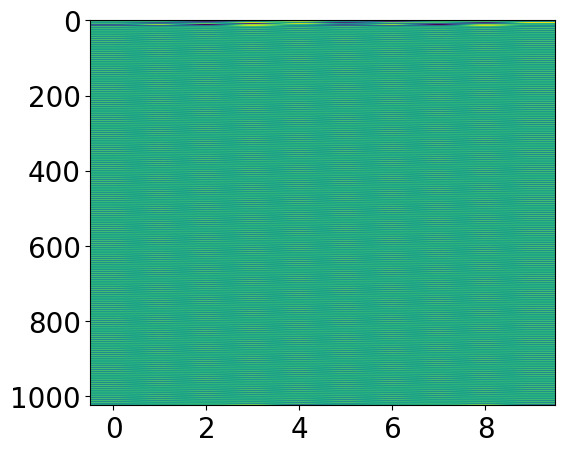

In [4]:
nqubits = 10
file_name = "../data/240214/rule30_%d"%(nqubits-6)
site_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nstep_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
init_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',dtype=int,skiprows=1,delimiter=',')
stTraj = raw.reshape((len(init_l),len(nstep_l),len(site_l)))

plt.figure(figsize=(6,5))
plt.imshow(stTraj[35,:,:],aspect='auto')

[68. 66. 68. 68. 66. 68. 68. 68. 68.]


(array([840.,   0.,   0.,   0.,   0.,   0.,   0., 180.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([  66.  ,   85.16,  104.32,  123.48,  142.64,  161.8 ,  180.96,
         200.12,  219.28,  238.44,  257.6 ,  276.76,  295.92,  315.08,
         334.24,  353.4 ,  372.56,  391.72,  410.88,  430.04,  449.2 ,
         468.36,  487.52,  506.68,  525.84,  545.  ,  564.16,  583.32,
         602.48,  621.64,  640.8 ,  659.96,  679.12,  698.28,  717.44,
         736.6 ,  755.76,  774.92,  794.08,  813.24,  832.4 ,  851.56,
         870.72,  889.88,  909.04,  928.2 ,  947.36,  966.52,  985.68,
        1004.84, 1024.  ]),
 <BarContainer object of 50 artists>)

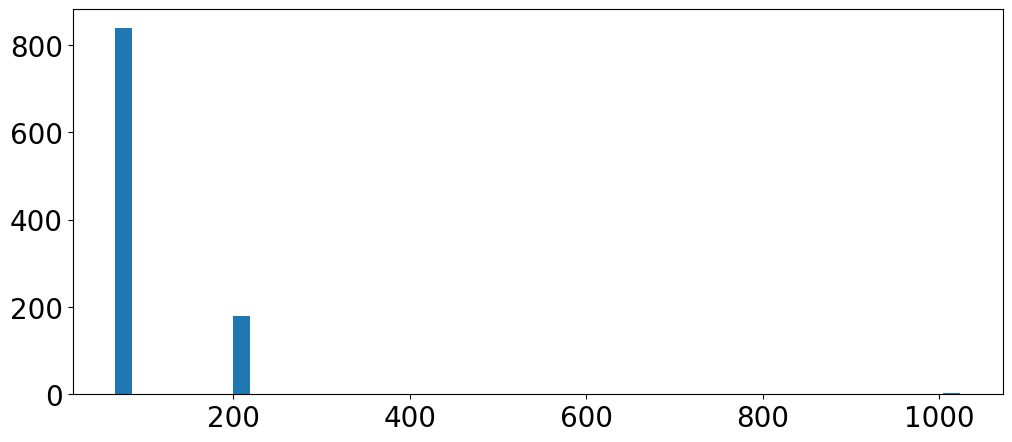

In [137]:
nbitstr = 2**nqubits
trunc = nbitstr+4
freq_l = np.zeros(nbitstr-2)
for i in range(0,nbitstr-2):
    stInt = stTraj[i+1,:,:].dot(1 << np.arange(stTraj.shape[-1] - 1, -1, -1))
    stCnt = Counter(stInt)
    stCntSorted = sorted(stCnt.items(), key=lambda pair: pair[1], reverse=True)
    freq_l[i] = stCntSorted[0][1]

print(freq_l[1:10])
plt.hist(freq_l,bins=50)

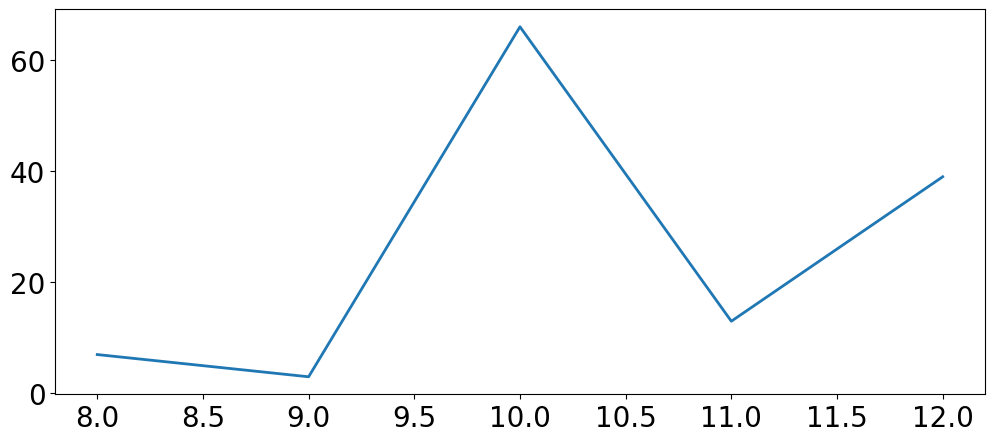

In [135]:
nqubits_l = [8,9,10,11,12]
minfreq_l = np.zeros(5)
freq2_l = np.zeros(5)

for qubit_idx, nqubits in enumerate(nqubits_l):
    file_name = "../data/240214/rule30_%d"%(nqubits-6)
    site_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    nstep_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
    init_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)

    raw = np.loadtxt(file_name+'_data.csv',dtype=int,skiprows=1,delimiter=',')
    stTraj = raw.reshape((len(init_l),len(nstep_l),len(site_l)))

    nbitstr = 2**nqubits
    trunc = nbitstr+4
    freq_l = np.zeros(nbitstr-2)
    for i in range(0,nbitstr-2):
        stInt = stTraj[i+1,:,:].dot(1 << np.arange(stTraj.shape[-1] - 1, -1, -1))
        stCnt = Counter(stInt)
        stCntSorted = sorted(stCnt.items(), key=lambda pair: pair[1], reverse=True)
        freq_l[i] = stCntSorted[0][1]

    minfreq_l[qubit_idx] = np.min(freq_l)

plt.plot(nqubits_l,minfreq_l)

check collision at early time

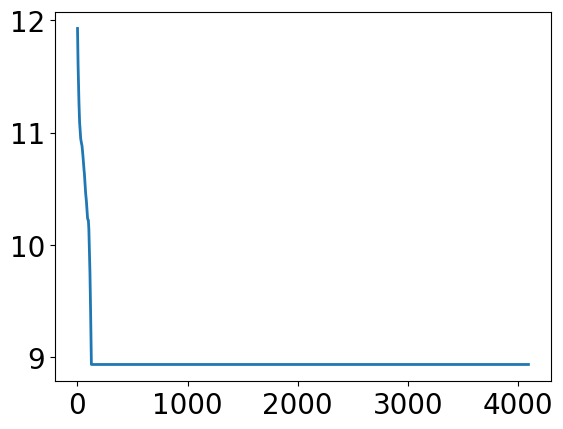

In [79]:
nqubits = 12
file_name = "../data/240214/rule30_%d"%(nqubits-6)
site_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nstep_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
init_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',dtype=int,skiprows=1,delimiter=',')
stTraj = raw.reshape((len(init_l),len(nstep_l),len(site_l)))

# S_l = np.zeros(len(nstep_l))

# for step_idx, step in enumerate(nstep_l):
#     stInt = stTraj[:,step_idx,:].dot(1 << np.arange(stTraj.shape[-1] - 1, -1, -1))
#     stCnt = Counter(stInt)
#     S_l[step_idx] = -np.average(np.log2(list(stCnt.values()))) + nqubits

# plt.plot(nstep_l,S_l)


(0.0, 200.0)

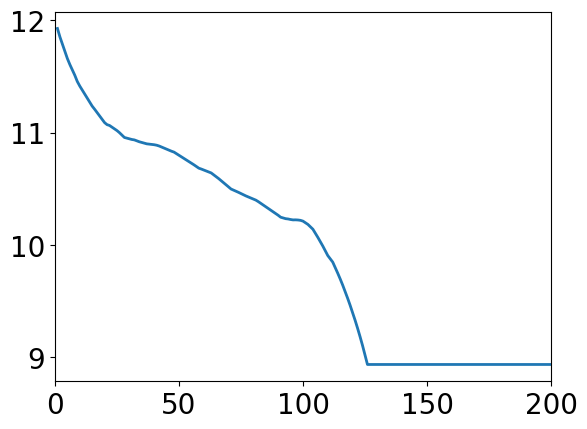

In [97]:
plt.plot(nstep_l,S_l)
plt.xlim([0,200])

In [99]:
nqubits = 12
file_name = "../data/240214/rule30_%d"%(nqubits-6)
site_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nstep_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
init_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',dtype=int,skiprows=1,delimiter=',')
stTraj = raw.reshape((len(init_l),len(nstep_l),len(site_l)))

col_dict = dict()
step_idx = 0
# stInt = stTraj[:,step_idx,:].dot(1 << np.arange(stTraj.shape[-1] - 1, -1, -1))
stInt = stTraj[:,step_idx,:].dot(1 << np.arange(0,stTraj.shape[-1],1))

for init in range(2**nqubits):
    if stInt[init] not in col_dict.keys():
        col_dict[stInt[init]] = [init]
    else:
        col_dict[stInt[init]] += [init]

max_key = 0
max_key_cnt = 0
for key in sorted(col_dict.keys(),reverse=True):
    if len(col_dict[key]) > max_key_cnt and len(col_dict[key])<10000:
        max_key = key
        max_key_cnt = len(col_dict[key])


In [100]:
print(max_key,max_key_cnt)
print(col_dict[max_key])

# nqubits=12, step=0, max_key=4088,  max_key_cnt=2
print(format(1168,'012b'),format(2343,'012b'),format(4088,'012b')
      )

print(format(2343 ^ 1168,'012b'))

4095 3
[585, 1170, 2340]
010010010000 100100100111 111111111000
110110110111


In [101]:
bin(2343 ^ 1168).count('1')

9

look at OTOC correlation in pair-wise collision

In [102]:
OTOC_arr = []

for key in sorted(col_dict.keys(),reverse=True):
    if len(col_dict[key]) == 2:
        tmp = format(col_dict[key][0] ^ col_dict[key][1],'0%db'%(nqubits))
        row = np.zeros((nqubits),dtype=int)
        for i in range(nqubits):
            if tmp[i] == '1':
                row[i] = 1
        OTOC_arr.append(row)
OTOC_arr=np.array(OTOC_arr)

In [103]:
OTOC_dict = dict()

for i in range(OTOC_arr.shape[0]):
    if OTOC_arr[i,0]==0:
        # print(OTOC_arr[i,:])
        
        OTOC_int = int(''.join(str(i) for i in OTOC_arr[i,:]), 2)
        if OTOC_int not in OTOC_dict.keys():
            OTOC_dict[OTOC_int] = 1
        else:
            OTOC_dict[OTOC_int] += 1

for OTOC_int in sorted(OTOC_dict.keys(),reverse=True):
    print(OTOC_dict[OTOC_int])

1
2
2
2
2
4
2
4
4
2
4
4
4
2
4
4
4
4
7


In [82]:
min_dist = 10
for i in range(OTOC_arr.shape[0]):
    zeros_pos = np.where(OTOC_arr[0,:]==0)[0]
    for j in range(len(zeros_pos)):
        dist = (zeros_pos[(j+1)%len(zeros_pos)]-zeros_pos[j]) % nqubits
        if dist < min_dist:
            min_dist = dist
    
print(min_dist)

3


In [78]:
zeros_pos

array([2, 5, 8])

In [79]:
OTOC_arr[0,:]

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

histogram of collision frequency

(0.0, 100.0)

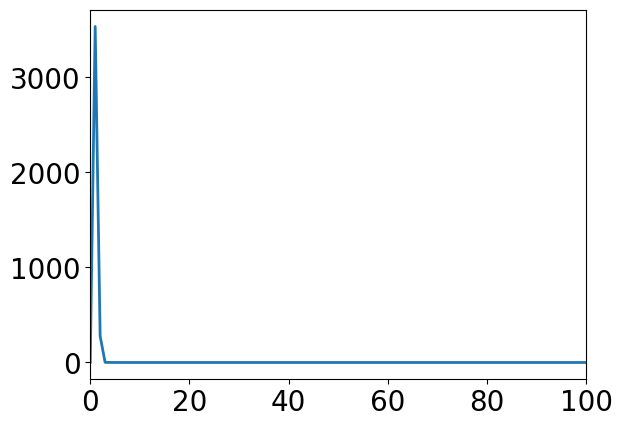

In [155]:
col_dict = dict()
step_idx = 0
# stInt = stTraj[:,step_idx,:].dot(1 << np.arange(stTraj.shape[-1] - 1, -1, -1))
stInt = stTraj[:,step_idx,:].dot(1 << np.arange(0,stTraj.shape[-1],1))


for init in range(2**nqubits):
    if stInt[init] not in col_dict.keys():
        col_dict[stInt[init]] = [init]
    else:
        col_dict[stInt[init]] += [init]

col_cnt = np.zeros(500)
for key in sorted(col_dict.keys(),reverse=True):
    col_cnt[len(col_dict[key])] += 1

plt.plot(col_cnt)
plt.xlim([0,100])

set step=0, chek double collision 

(array([ 21., 160.,  84.,  13.]),
 array([ 8.,  9., 10., 11., 12.]),
 <BarContainer object of 4 artists>)

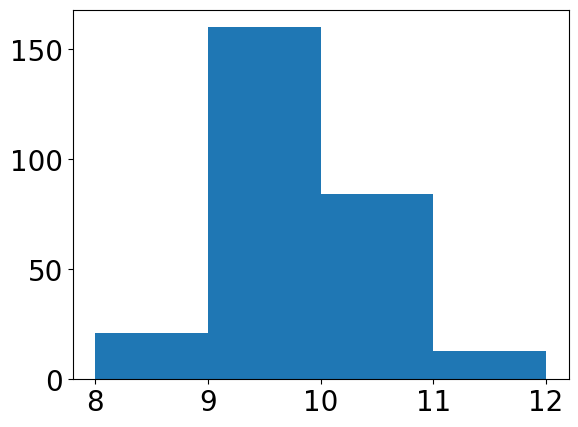

In [165]:
otoc_l = []
for key in sorted(col_dict.keys(),reverse=True):
    if len(col_dict[key]) == 2:
        init1 = col_dict[key][0]
        init2 = col_dict[key][1]
        otoc_l += [bin(init1 ^ init2).count('1')]

plt.hist(otoc_l,np.arange(8,13))

In [142]:
1 << np.arange(0,3, 1)

array([1, 2, 4])

#### Rule 54 Stag long time
nAsites = 1, nBsites = 100, nsteps = 3000, nmeas=1:10:1 1

nAsites = 1, nBsites = 100, nsteps = 3000, nmeas=1:50:1 32 code fixed


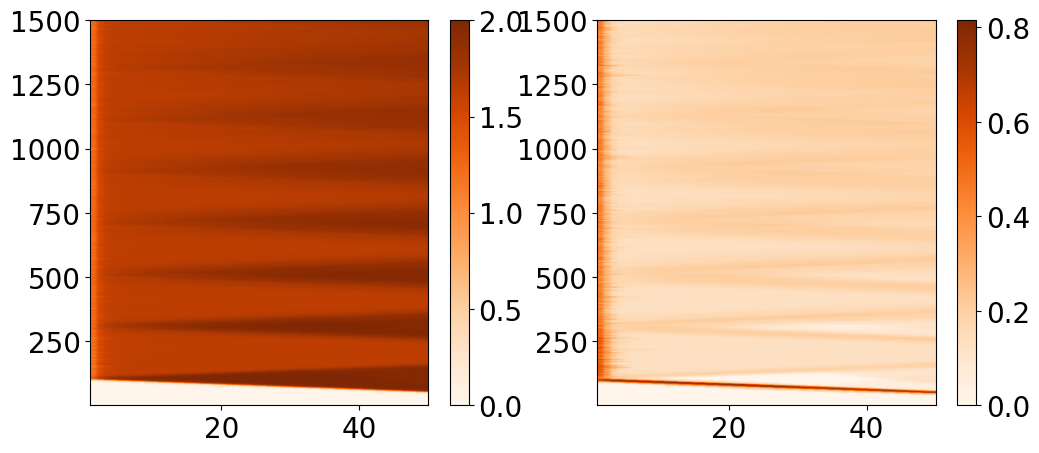

In [377]:
file_name = "../data/240214/240214_32"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,0:50],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],50,nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,0:50],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],50,nstep_l[0],nstep_l[-1]])
plt.colorbar()

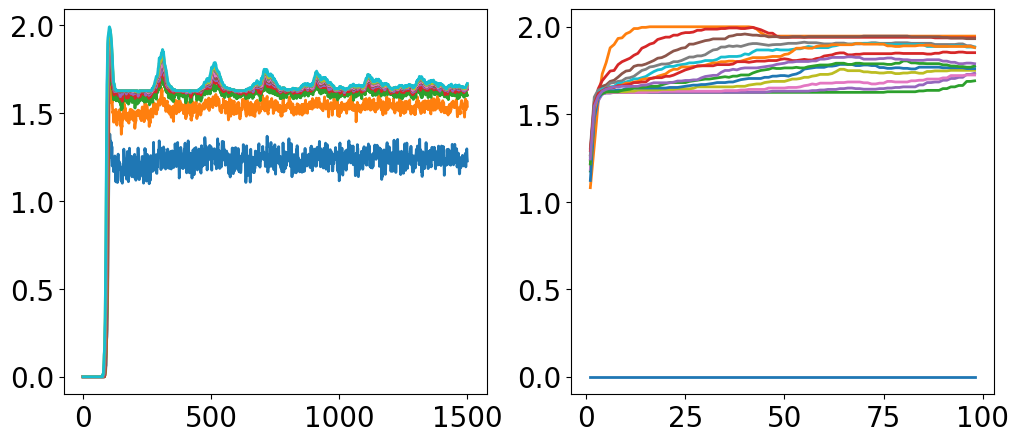

In [378]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    # plt.xlim([0,700])
plt.subplot(1,2,2)
for i in range(0,1500,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])

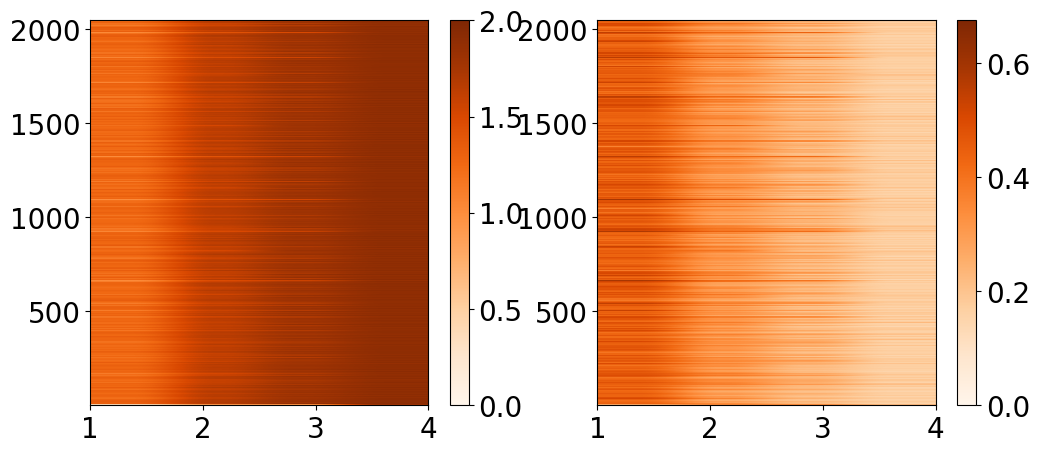

In [372]:
file_name = "../data/240214/240214_48"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,0:50],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,0:50],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

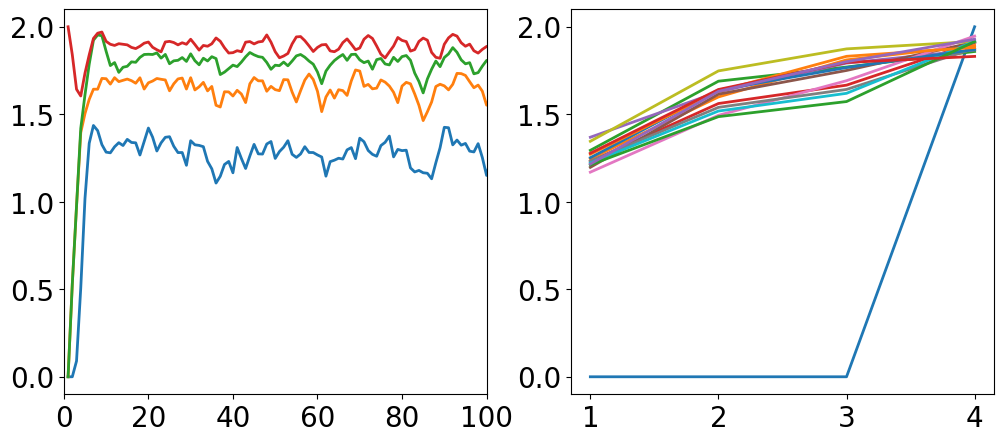

In [375]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,4,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    plt.xlim([0,100])
plt.subplot(1,2,2)
for i in range(0,1500,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])

#### Rule 30 Long Time
Asites = 1, Bsites = 7:17, nmeas = 1:5:1, 33-44

use 33,35,37,39,41,43 to observe periodicity

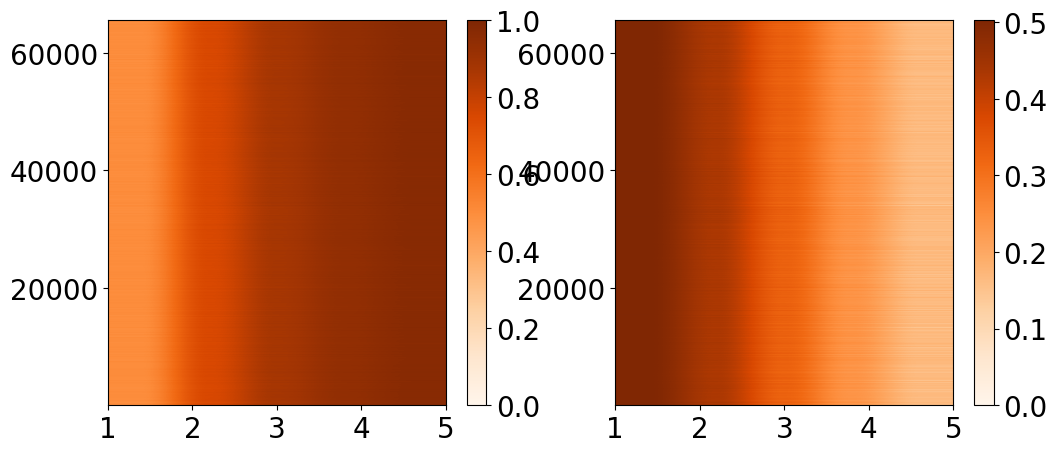

In [329]:
file_name = "../data/240214/240214_41"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

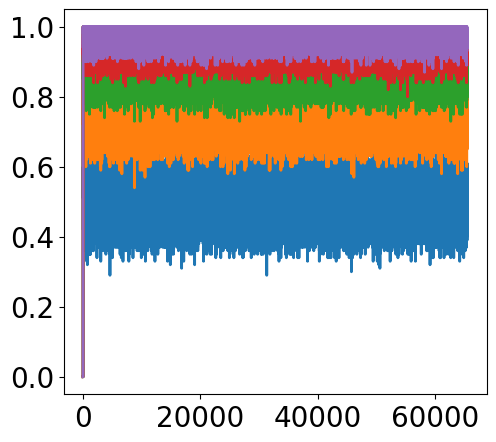

In [331]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,5,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    # plt.xlim([0,200])
# plt.subplot(1,2,2)
# for i in range(0,int(nstep_l[-1]),100):
#     plt.plot(nmeas_l,S_ave_arr[:,i])

In [ ]:
np.argmin(S_ave_arr[i,:])

3-8

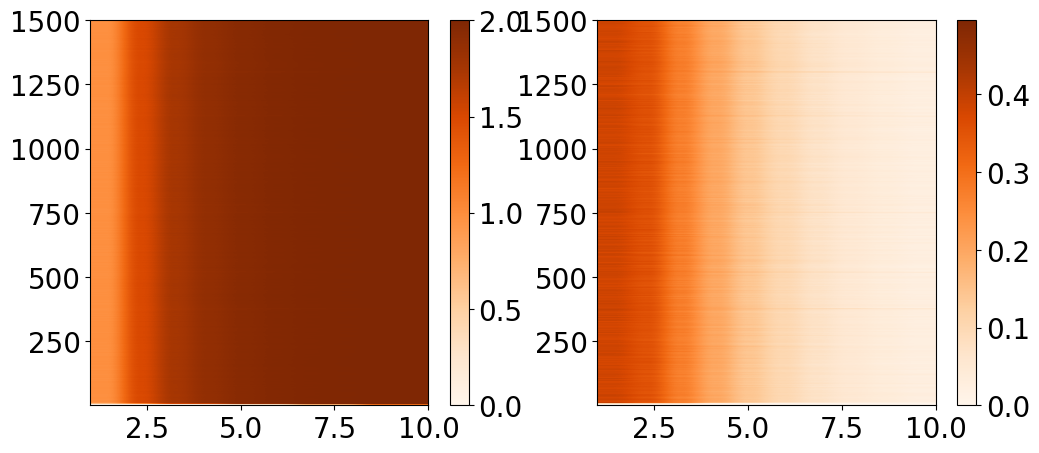

In [196]:
file_name = "../data/240214/240214_8"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

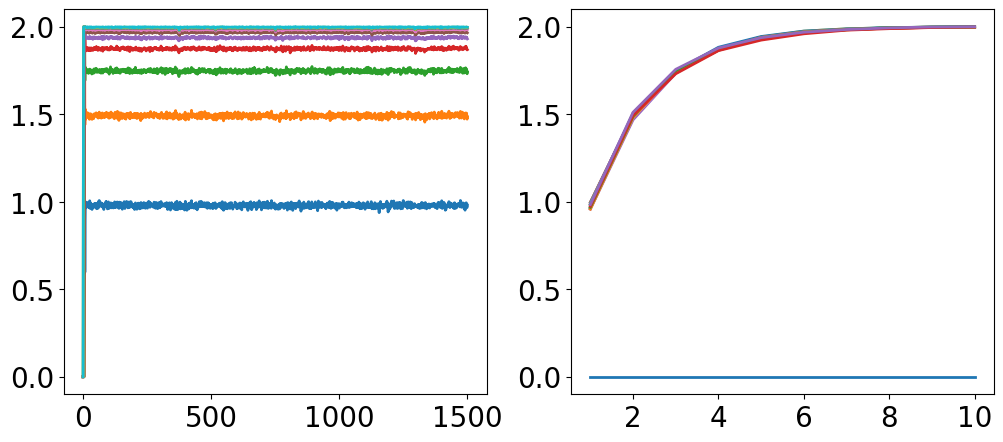

In [197]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    # plt.xlim([0,400])
plt.subplot(1,2,2)
for i in range(0,1500,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])

#### Rule 30 Asites = 8-12 Bsites = 0 run long time
check global information survival
9-14

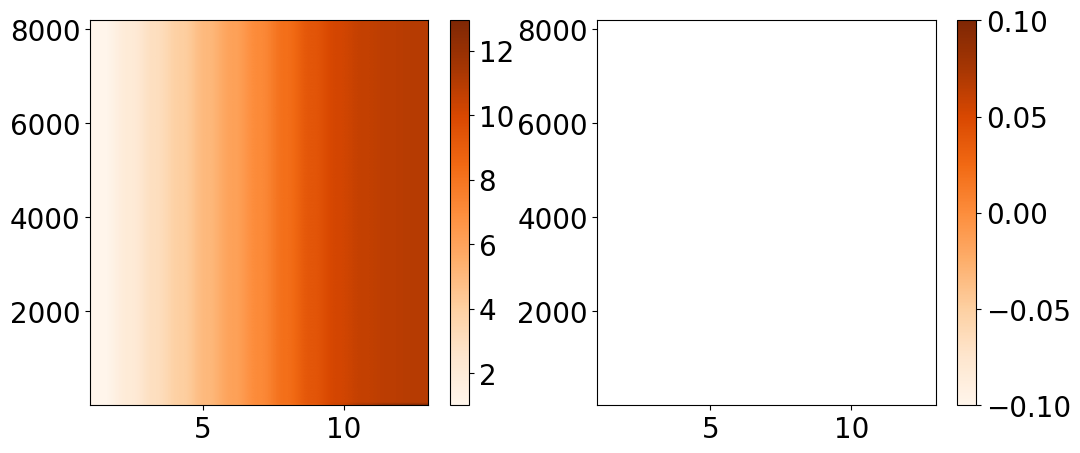

In [165]:
file_name = "../data/240214/240214_14"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

(0.0, 200.0)

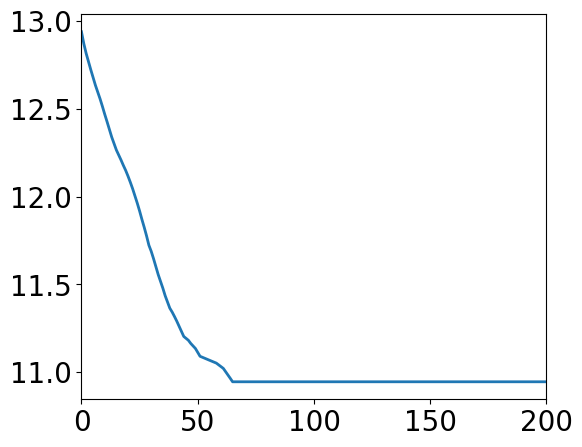

In [166]:
plt.figure(figsize=(6,5))
plt.plot(S_ave_arr[-1,:])
plt.xlim([0,200])

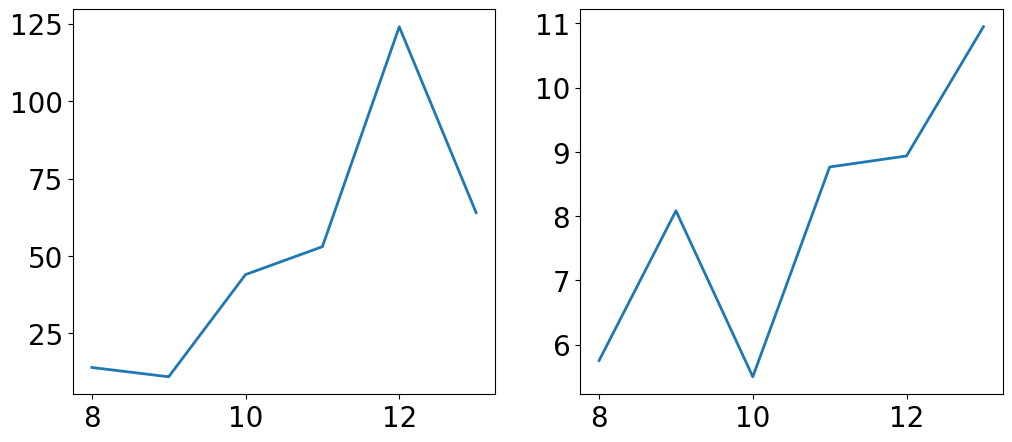

In [149]:
nqubits_l = [8,9,10,11,12,13]
sat_l = np.zeros(6)
minS_l = np.zeros(6)


for qubit_idx, nqubits in enumerate(nqubits_l):
    file_name = "../data/240214/240214_%d"%(nqubits+1)
    nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
    nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
    
    raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
    S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
    S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

    sat_l[qubit_idx] = np.argmax(np.diff(np.diff(S_ave_arr[-1,:])))
    minS_l[qubit_idx] = np.min(S_ave_arr[-1,:])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(nqubits_l,sat_l)
plt.subplot(1,2,2)
plt.plot(nqubits_l,minS_l)

#### Rule 54 Stag Asites = 8-12 Bsites = 0 run long time
check global information survival 
15-17

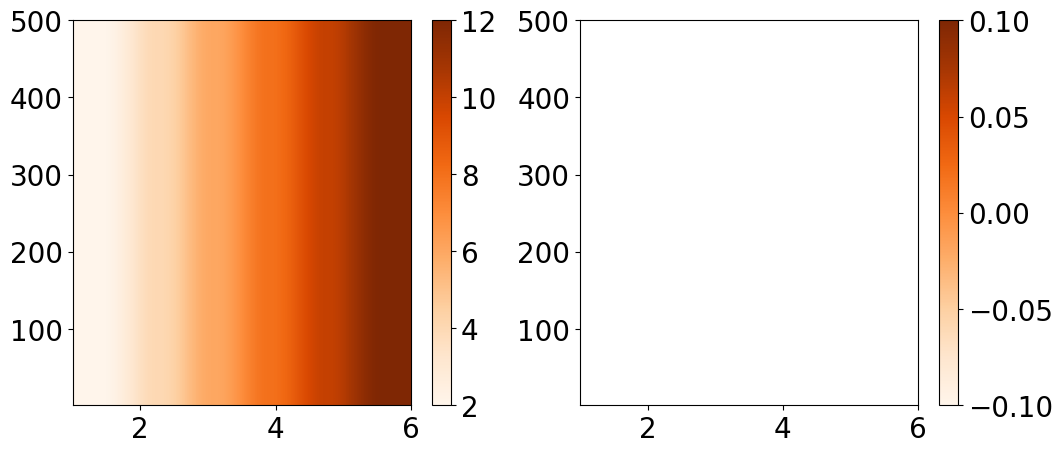

In [39]:
file_name = "../data/240214/240214_17"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

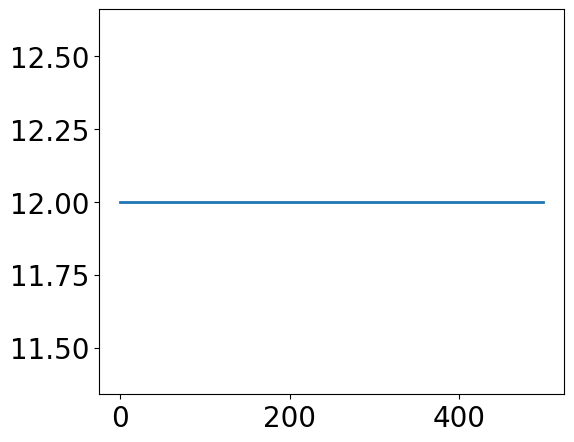

In [40]:
plt.figure(figsize=(6,5))
plt.plot(S_ave_arr[-1,:])
# plt.xlim([0,200])

#### Rule 54 Stag Asites = 1 Bsites = 100
do rule 54 again with the fixed code
18

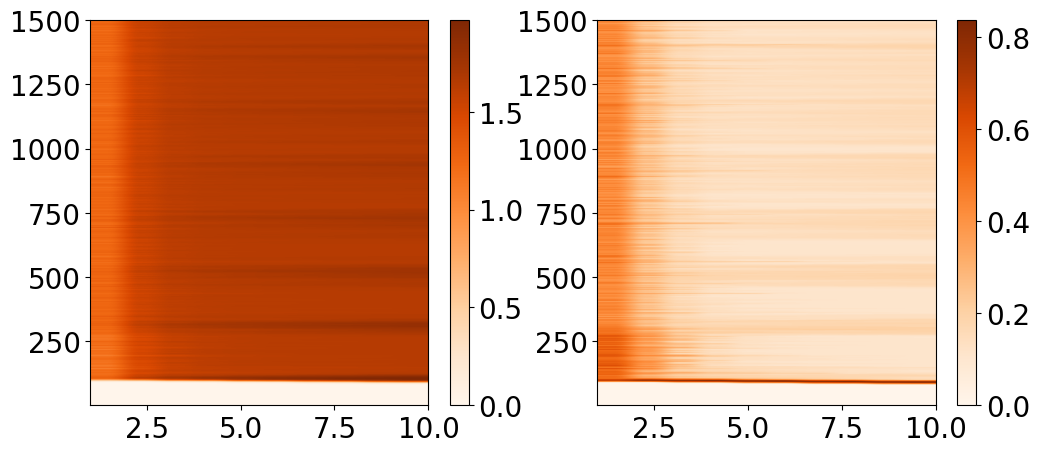

In [167]:
file_name = "../data/240214/240214_18"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.xlabel()
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

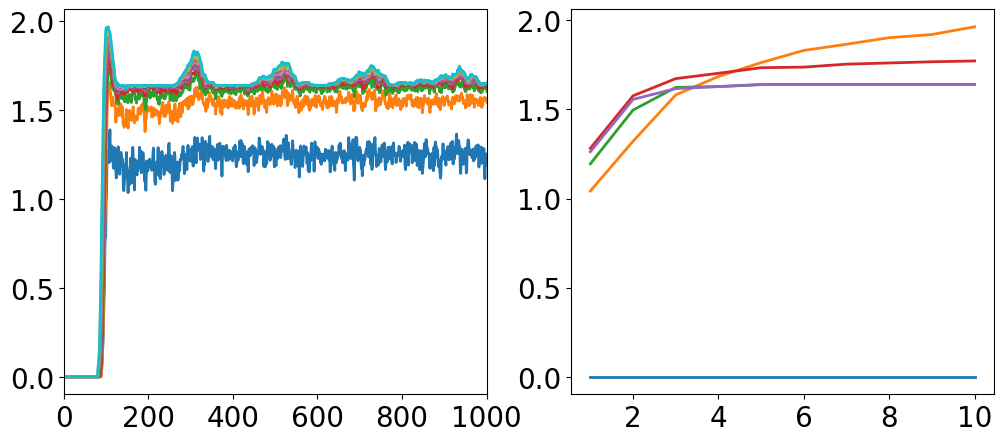

In [169]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    plt.xlim([0,1000])
plt.subplot(1,2,2)
for i in range(0,500,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])

#### Rule 54 Stag Intergrability Breaking
Asites = 1 Bsites = 100, scan nmeas = 1:1:10, pertb = 0:0.5:0.05 19

Asites = 1 Bsites = 50, scan nmeas = 1:1:5, pertb = 0:0.01:0.001 45

Asites = 1 Bsites = 100, scan nmeas = 1:1:5, pertb = 0:0.01:0.001 46

Asites = 1 Bsites = 25, scan nmeas = 5, pertb = 0:0.02:0.001 47

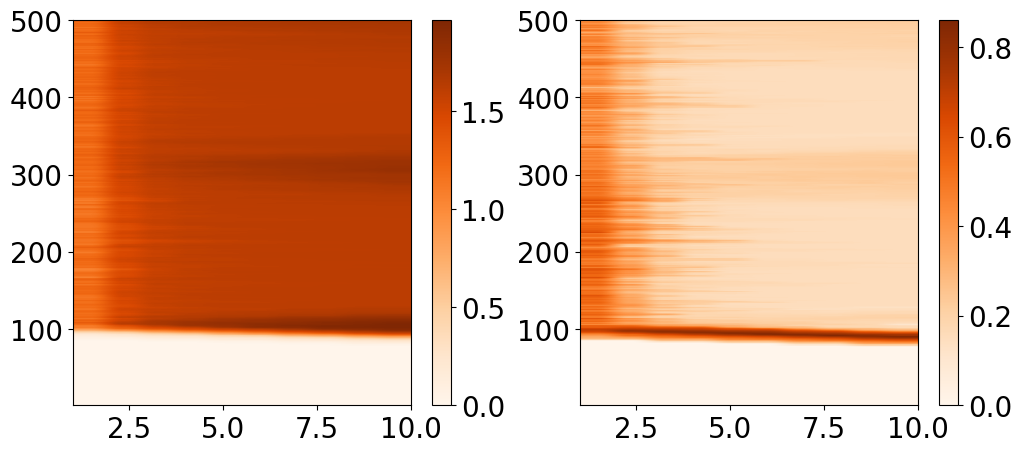

In [335]:
file_name = "../data/240214/240214_19"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))
# S_ave_arr = raw[:,0].reshape((1,len(nmeas_l),len(nstep_l)))
# S_std_arr = raw[:,1].reshape((1,len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr[0].T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr[0].T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

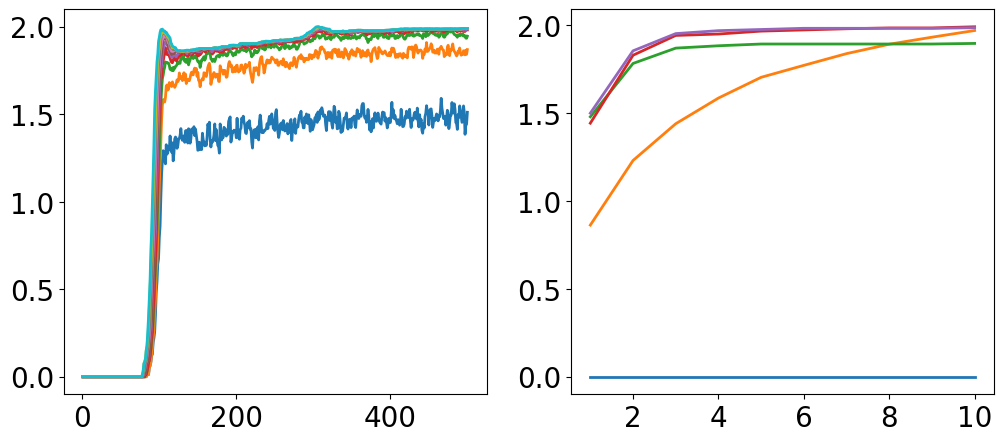

In [338]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[1][i,:])
    # plt.xlim([0,200])
plt.subplot(1,2,2)
for i in range(0,500,100):
    plt.plot(nmeas_l,S_ave_arr[1][:,i])

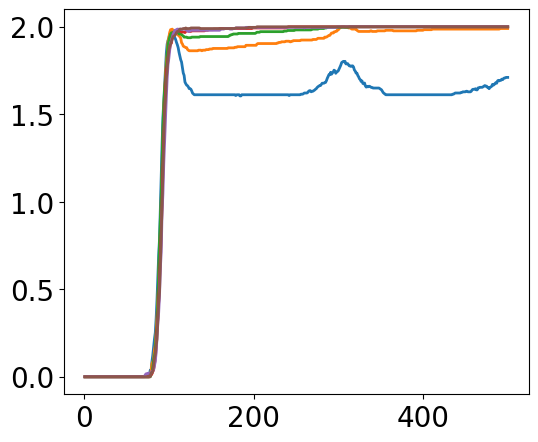

In [337]:
plt.figure(figsize=(6,5))
for i in range(0,len(pertb_l),1):
    plt.plot(nstep_l,S_ave_arr[i][-1,:])

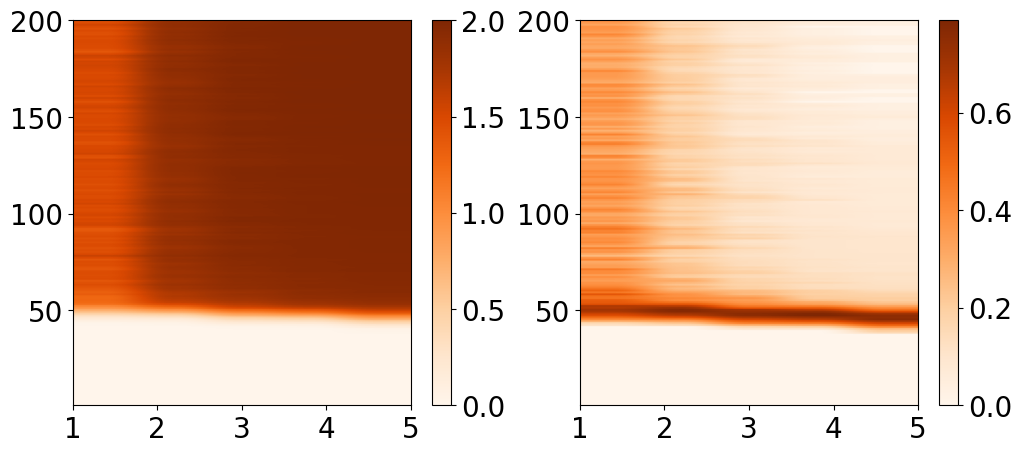

In [358]:
file_name = "../data/240214/240214_45"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))
# S_ave_arr = raw[:,0].reshape((1,len(nmeas_l),len(nstep_l)))
# S_std_arr = raw[:,1].reshape((1,len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr[-1].T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr[-1].T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

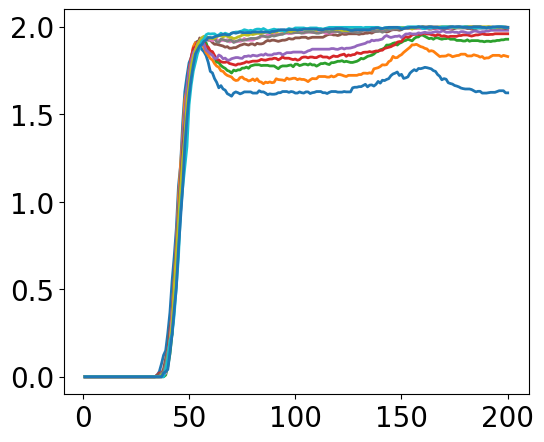

In [347]:
plt.figure(figsize=(6,5))
for i in range(0,len(pertb_l),1):
    plt.plot(nstep_l,S_ave_arr[i][-1,:])

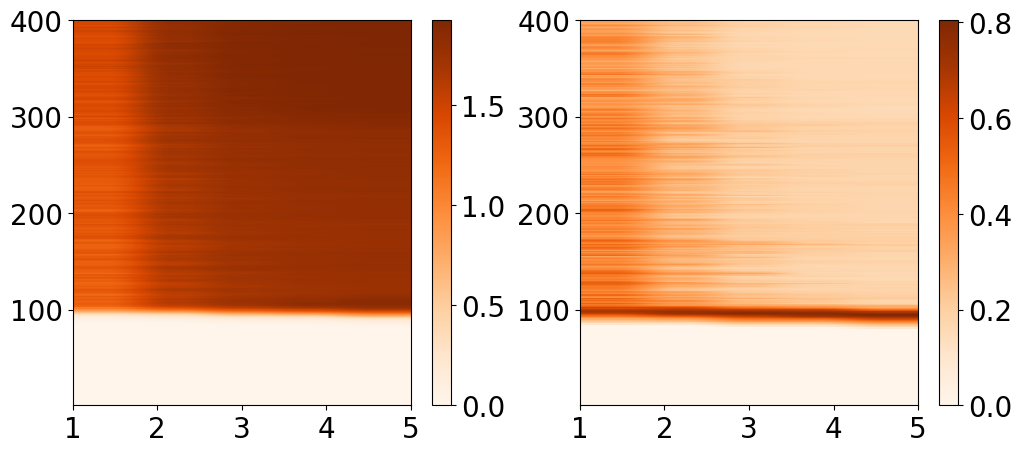

In [352]:
file_name = "../data/240214/240214_46"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))
# S_ave_arr = raw[:,0].reshape((1,len(nmeas_l),len(nstep_l)))
# S_std_arr = raw[:,1].reshape((1,len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr[1].T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr[1].T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

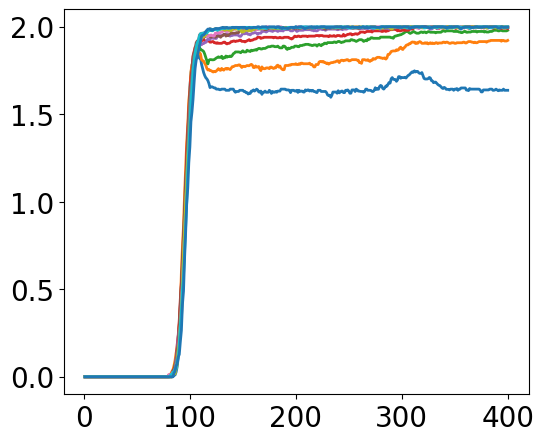

In [356]:
plt.figure(figsize=(6,5))
for i in range(0,len(pertb_l),1):
    plt.plot(nstep_l,S_ave_arr[i][-1,:])

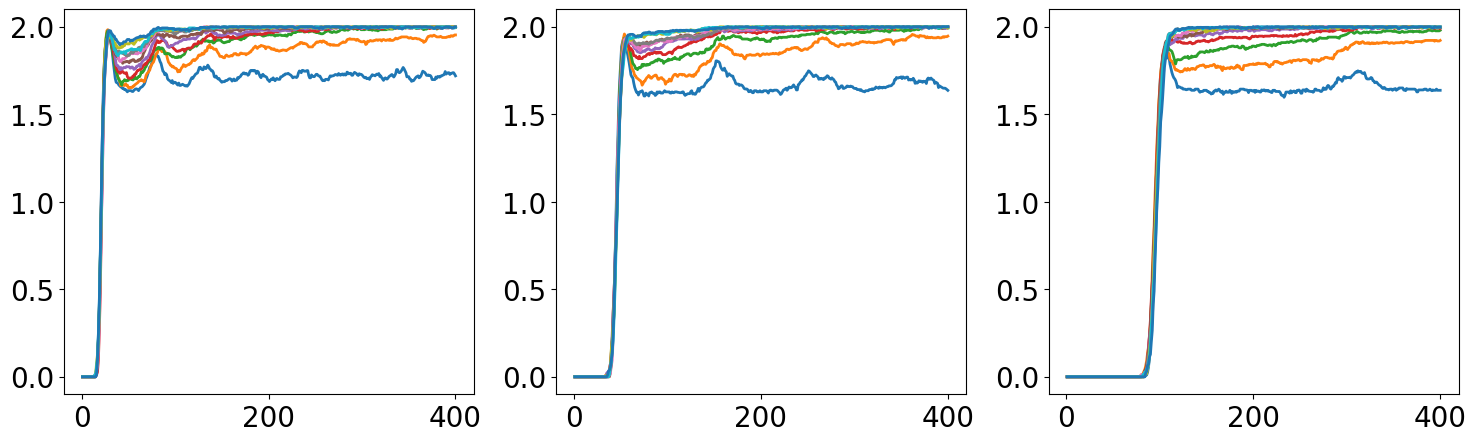

In [368]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
file_name = "../data/240214/240214_47"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),1,len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(pertb_l),1,len(nstep_l)))

for i in range(0,int(len(pertb_l)/2)+1,1):
    plt.plot(nstep_l,S_ave_arr[i][-1,:])

plt.subplot(1,3,2)
file_name = "../data/240214/240214_45"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))

for i in range(0,len(pertb_l),1):
    plt.plot(nstep_l,S_ave_arr[i][-1,:])

plt.subplot(1,3,3)
file_name = "../data/240214/240214_46"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))

for i in range(0,len(pertb_l),1):
    plt.plot(nstep_l,S_ave_arr[i][-1,:])

#### Rule F
Asites = 4 Bsites = 0 check reversibility


Asites = 1 Bsites = 100 RndMeasStag F1 22


Asites = 1 Bsites = 100 RndMeasStag F2 24

Asites = 1 Bsites = 100 RndMeasStag 54 25

Asites = 1 Bsites = 100 RndMeasStag F3 30

Asites = 1 Bsites = 100 MeasStag 54 26

Asites = 1 Bsites = 100 MeasStag F1 27

Asites = 1 Bsites = 100 MeasStag F2 28

Asites = 1 Bsites = 100 MeasStag F3 29

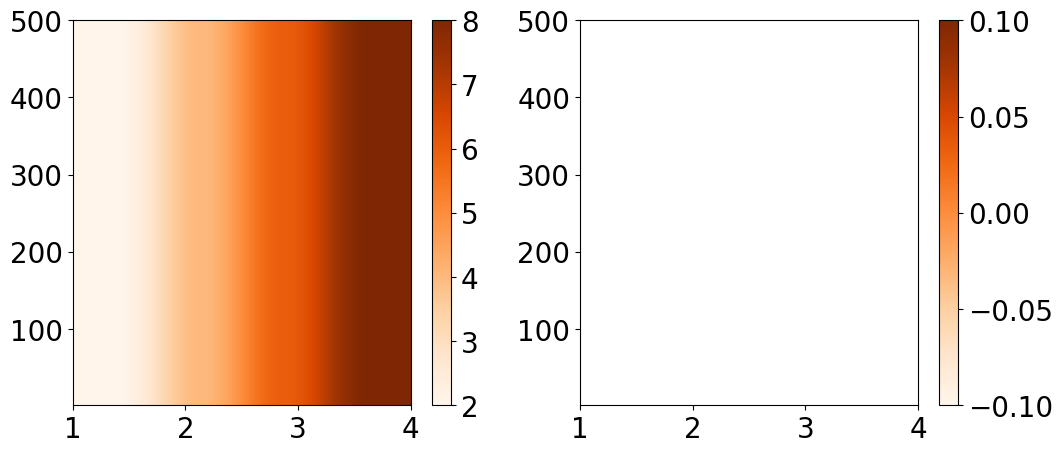

In [90]:
# corrupted
file_name = "../data/240214/240214_20"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

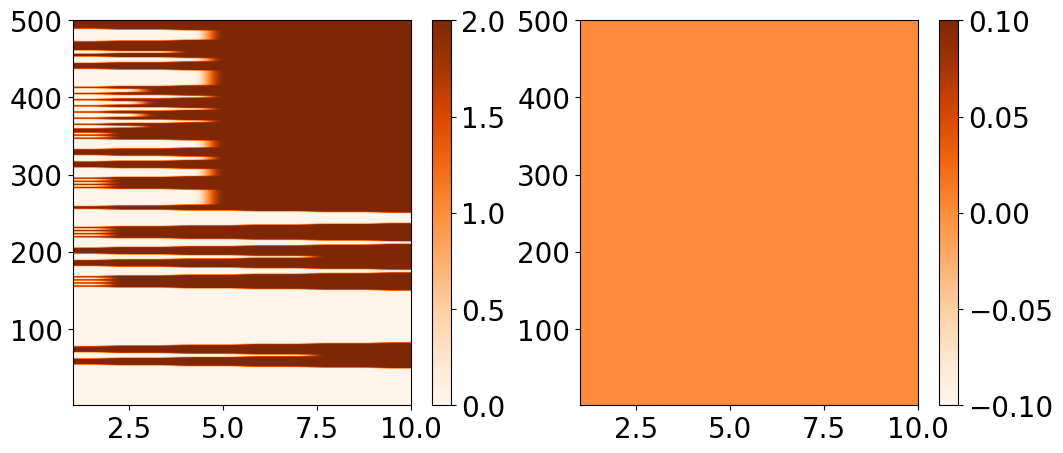

In [91]:
file_name = "../data/240214/240214_21"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

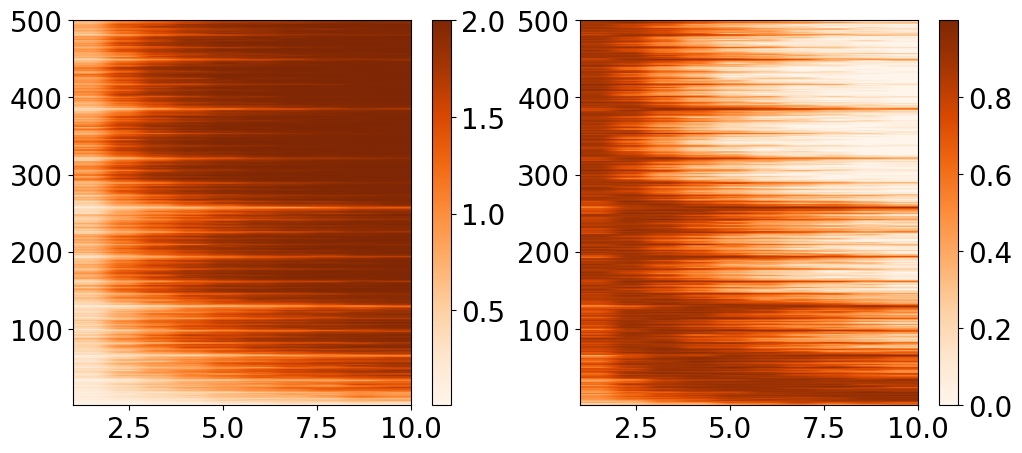

In [105]:
file_name = "../data/240214/240214_22"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

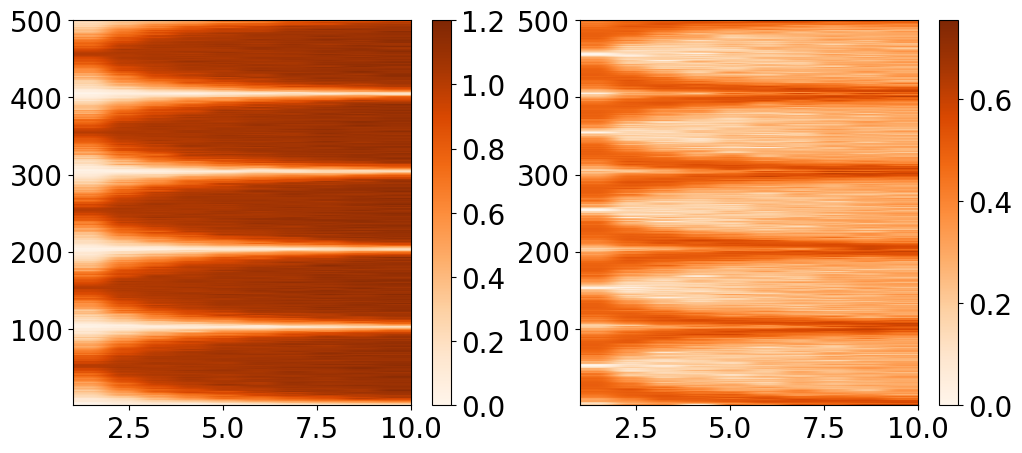

In [107]:
file_name = "../data/240214/240214_24"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

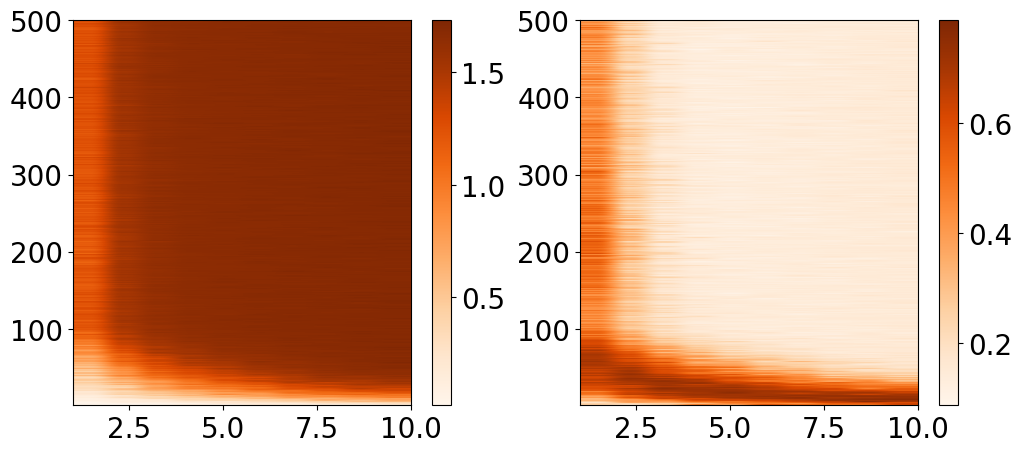

In [108]:
file_name = "../data/240214/240214_25"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

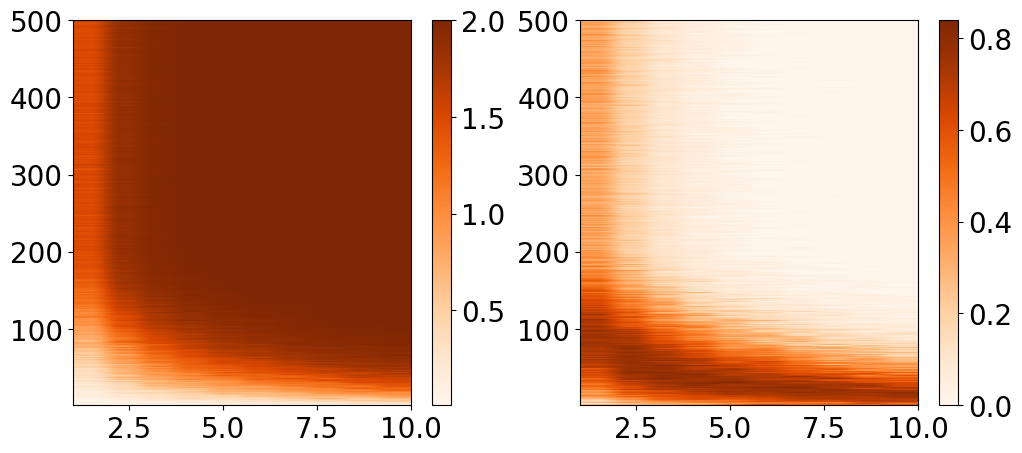

In [115]:
file_name = "../data/240214/240214_30"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

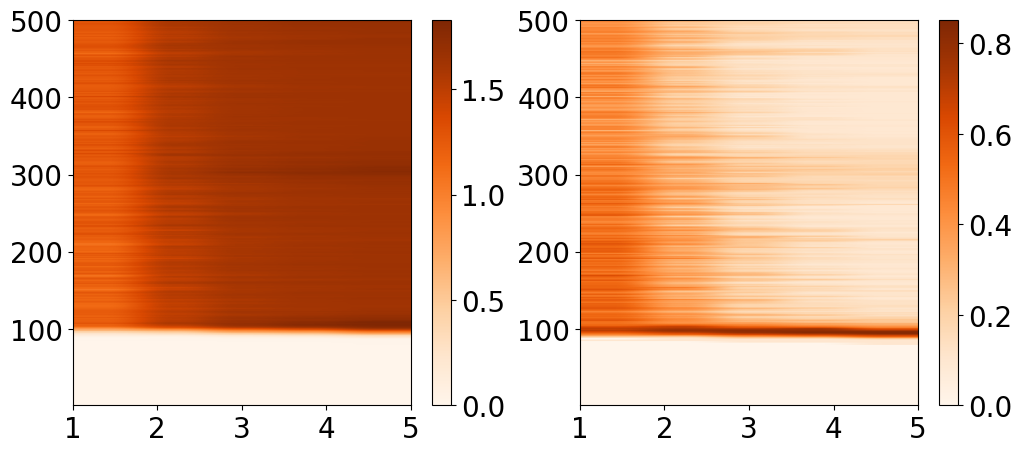

In [111]:
file_name = "../data/240214/240214_26"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

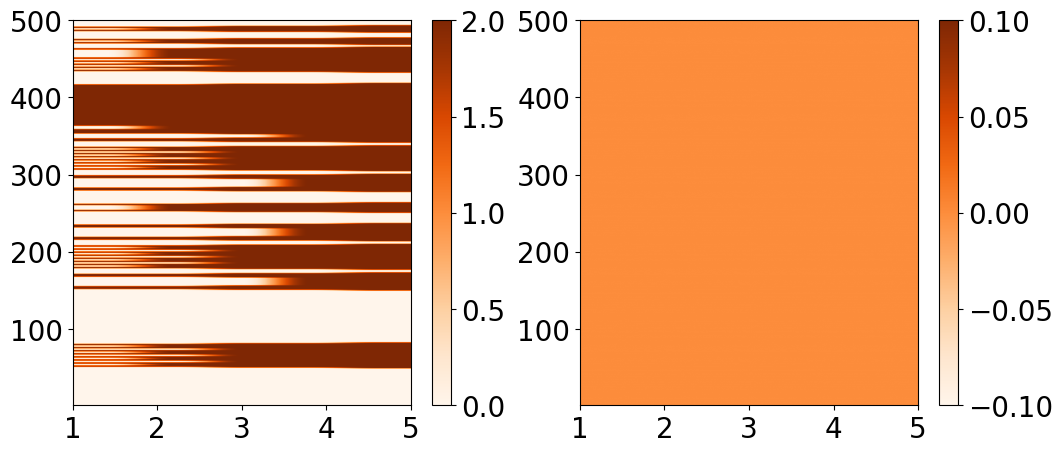

In [112]:
file_name = "../data/240214/240214_27"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

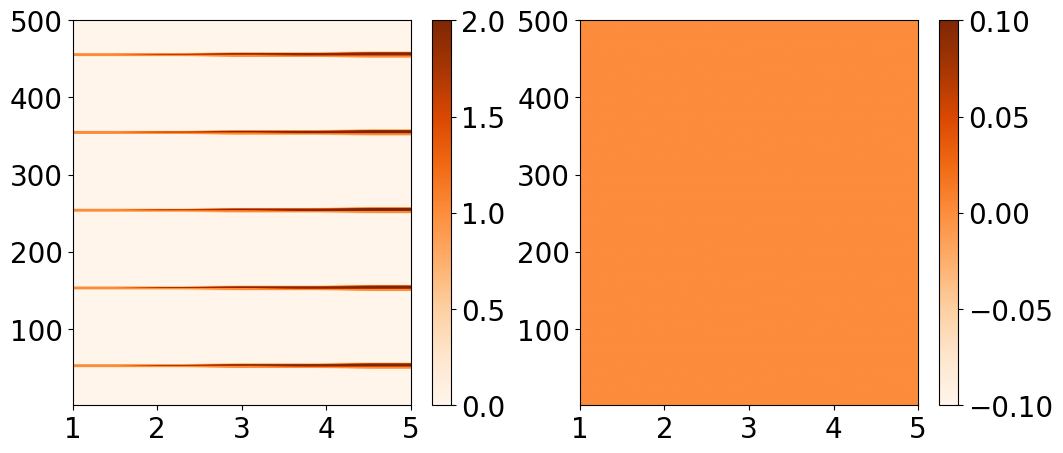

In [113]:
file_name = "../data/240214/240214_28"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

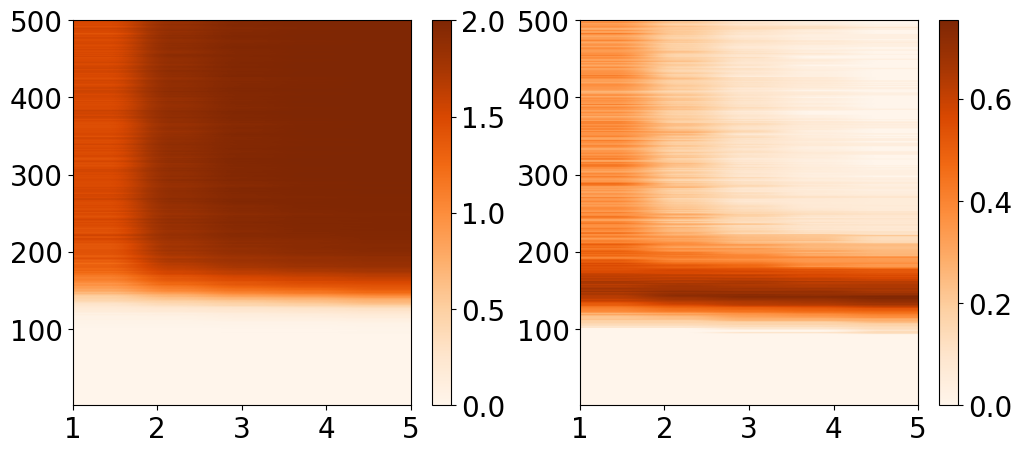

In [114]:
file_name = "../data/240214/240214_29"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

#### Rule 30 Long time
Asites=1,Bsites=9 23

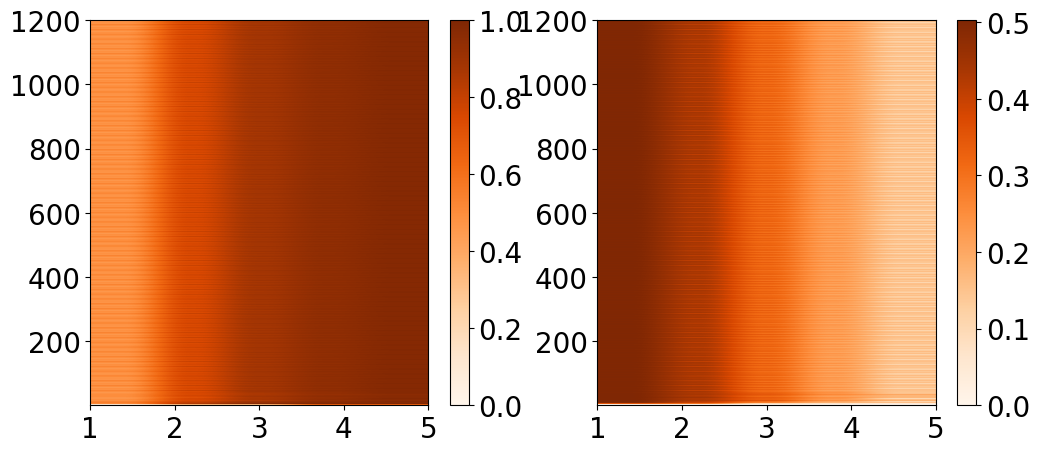

In [94]:
file_name = "../data/240214/240214_23"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

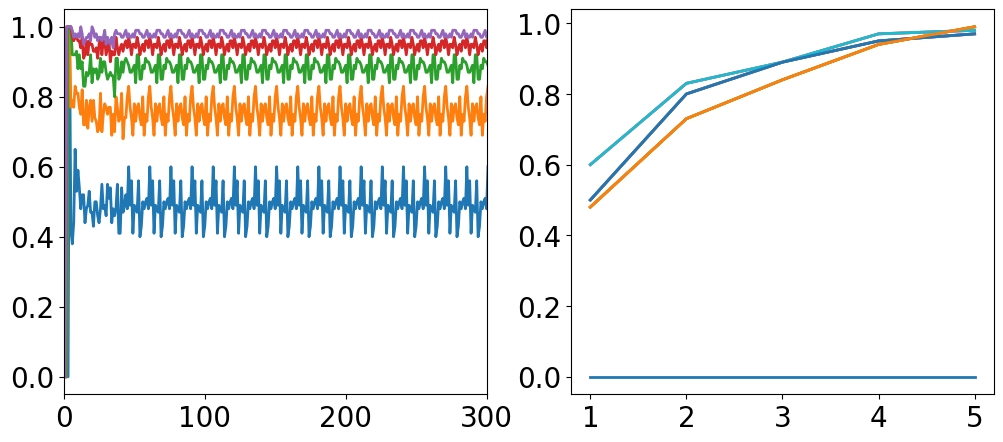

In [96]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,5,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    plt.xlim([0,300])
plt.subplot(1,2,2)
for i in range(0,1200,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])

#### Rule 110
Asite = 5, Bsite = 100 30

Asite = 1, Bsite = 100 31

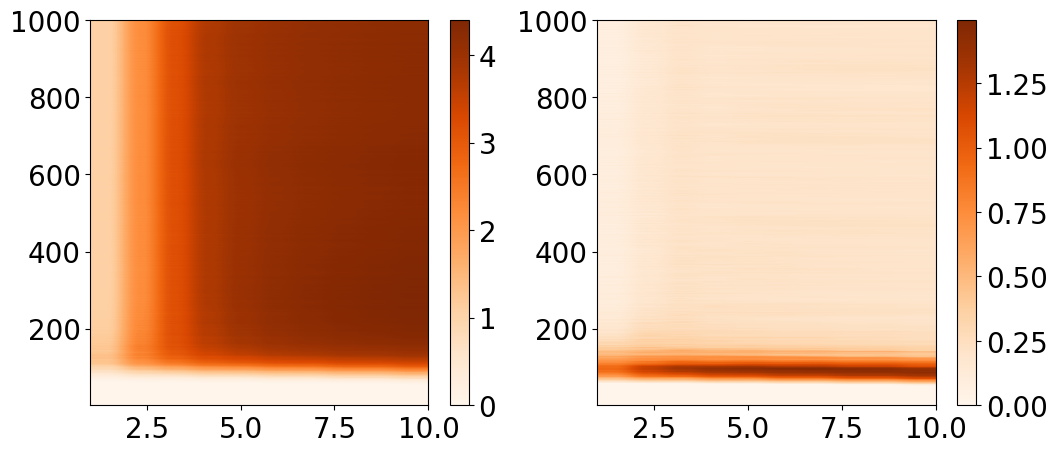

In [117]:
file_name = "../data/240214/240214_30"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

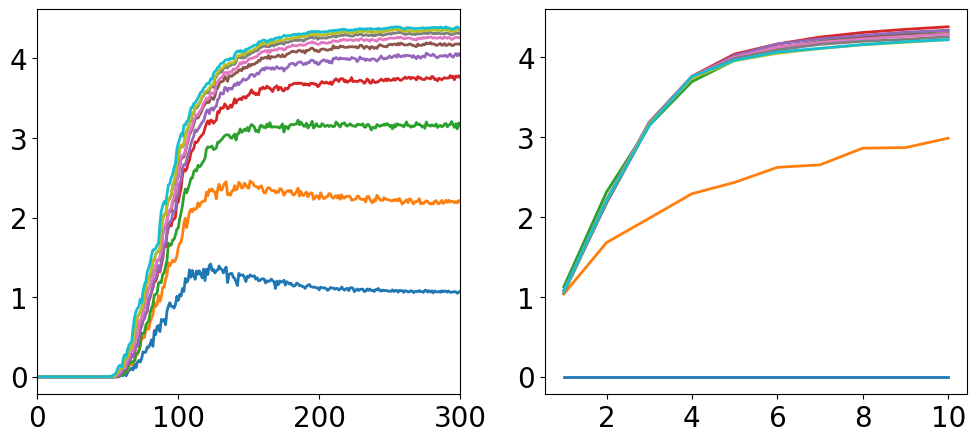

In [119]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    plt.xlim([0,300])
plt.subplot(1,2,2)
for i in range(0,1000,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])

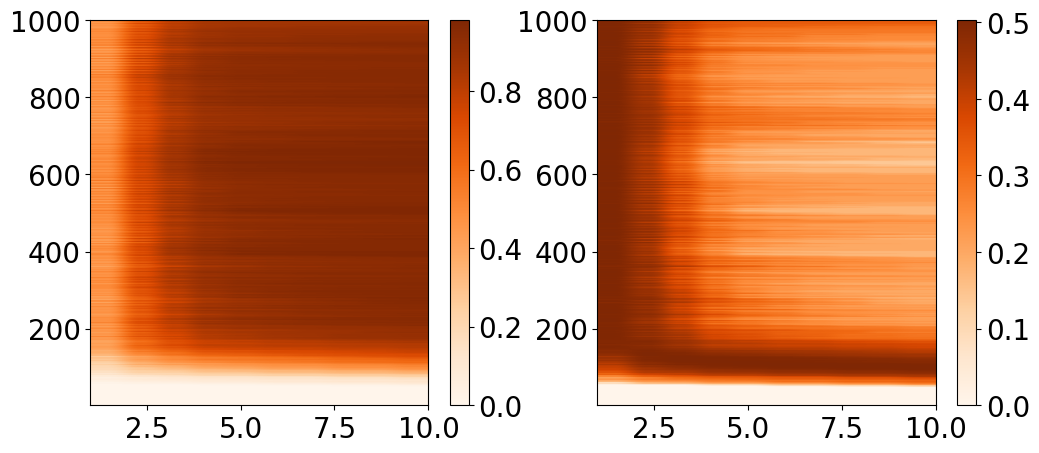

In [120]:
file_name = "../data/240214/240214_31"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

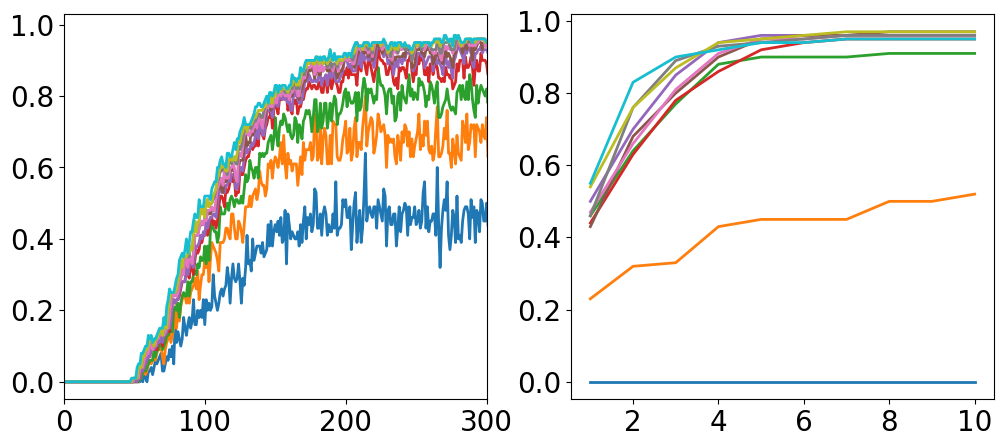

In [121]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    plt.xlim([0,300])
plt.subplot(1,2,2)
for i in range(0,1000,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])